# Beispiel 9: b) Nichtlineare Regression mit dem Gauß-Newton-Verfahren

Wir betrachten nun einen weiteren Datensatz (Quelle: M. A. Treloar: “Effects
of Puromycin on Galactosyltransferase of Golgi Membranes” nach D.M Bates & D.G. Watts: "Nonlinear Regression Analysis and Its Applications", Wiley & Sons, 1988).

In [12]:
PuromycinData =[
0.02 76 67;
0.02 47 51;
0.06 97 84;
0.06 107 86;
0.11 123 98;
0.11 139 115;
0.22 159 131;
0.22 152 124;
0.56 191 144;
0.56 201 158;
1.10 207 160;
1.10 200 NaN]

PuromycinData =

     0.020000    76.000000    67.000000
     0.020000    47.000000    51.000000
     0.060000    97.000000    84.000000
     0.060000   107.000000    86.000000
     0.110000   123.000000    98.000000
     0.110000   139.000000   115.000000
     0.220000   159.000000   131.000000
     0.220000   152.000000   124.000000
     0.560000   191.000000   144.000000
     0.560000   201.000000   158.000000
     1.100000   207.000000   160.000000
     1.100000   200.000000          NaN



theta0 =

   300.00000     0.50000



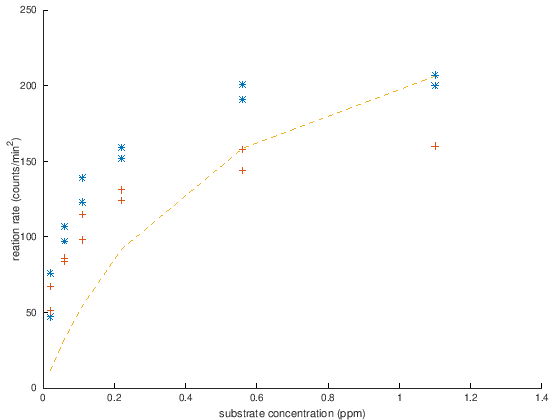

In [13]:
xconc = PuromycinData(:,1);   
vtreated = PuromycinData(:,2);
vuntreated = PuromycinData(:,3);

theta0 = [300, 0.5]
vapprox = MichaelisMenten(xconc, theta0 );

hold on
plot(xconc, vtreated, "*" )
plot(xconc, vuntreated, "+" )
plot(xconc, vapprox, "--" )
xlabel("substrate concentration (ppm)")
ylabel("reation rate (counts/min^2)")


## Modellierung
Es wird angenommen, dass die Geschwindigkeit der Reaktion über eine Michaelis-Menten-Kinetik beschrieben werden kann:
$$ v(x) = \frac{\theta_1 x}{ \theta_2 + x}
$$
Dabei sind die Modell-Parameter $\theta_1$, $\theta_2$ sind zu bestimmen. Die Größe $x$ ist die experimentell verwendete Substrat-Konzentration. 

In [14]:
function fval = MichaelisMenten(x, theta)
    fval = (theta(1).*x)./(theta(2).+x);
end


## Algorithmen

Alle Ableitungen $\frac{\partial f}{\partial \theta_i}(x, \theta)$ sollen numerisch bestimmt werden:

In [4]:
function fprime = num_deriv(f, i, x, theta)
    eps = 1e-8;
    delta = zeros(size(theta));
    delta(i) = abs(theta(i)*eps);
    deltaf = f(x,theta+delta) - f(x,theta);
    fprime = deltaf/abs(delta(i));
end

In [5]:
function theta_opt = GaussNewtonOptim(f, x, y, theta0)
   
   % Startwert
    mytheta = theta0;
    
    
    # Iteration
    for k=1:7
    
    % Ausgabe
    disp ("==============================")
    disp ("Iteration")
    k
    mytheta
    
    % Berechne Residuum
    r = f(x, mytheta) - y;
    obj = norm (r);
    obj =obj*obj
    
    % Berechne Jacobi-Matrix bzgl. theta
    J(:,1) = num_deriv(f, 1, x, mytheta);
    J(:,2) = num_deriv(f, 2, x, mytheta);
    % 
    
    % Berechne Abstiegsrichtung über Normalengleichung
    delta_theta = linsolve(J'*J, -J'*r) 
    
    % Bestimme ein optimales Update ueber Liniensuche 
    j_opt=1
    obj_opt = obj
    lambda = [1 0.5 0.25 0.125 0.0625 0.0625/2]
    for j=1:6 
        tentative = mytheta + lambda(j)*delta_theta';
        r = f(x, tentative) - y;
        
        obj = norm (r);
        obj =obj*obj;
        
        if (obj < obj_opt)
            j_opt = j;
            obj_opt = obj;
        end 
    end
    
    # Auswahl der naechsten Iterierten
        j_opt
        obj_opt 
        mytheta = mytheta + lambda(j_opt)*delta_theta' 
    end % for k=1:3

    theta_opt = mytheta;
end

# Anwendung 
Fall A: Mit Puromycin (treated)

In [6]:
theta_opt = GaussNewtonOptim(@MichaelisMenten, xconc, vtreated, theta0)

Iteration
k =  1
mytheta =

   300.00000     0.50000

obj =  38256.00490
delta_theta =

  -256.1766
    -1.2586

j_opt =  1
obj_opt =  38256.00490
lambda =

   1.000000   0.500000   0.250000   0.125000   0.062500   0.031250

j_opt =  3
obj_opt =  13521.22007
mytheta =

   235.95585     0.18536

Iteration
k =  2
mytheta =

   235.95585     0.18536

obj =  13521.22007
delta_theta =

  -39.66916
   -0.19935

j_opt =  1
obj_opt =  13521.22007
lambda =

   1.000000   0.500000   0.250000   0.125000   0.062500   0.031250

j_opt =  2
obj_opt =  2229.3
mytheta =

   216.121266     0.085685

Iteration
k =  3
mytheta =

   216.121266     0.085685

obj =  2229.3
delta_theta =

  -3.234961
  -0.023020

j_opt =  1
obj_opt =  2229.3
lambda =

   1.000000   0.500000   0.250000   0.125000   0.062500   0.031250

j_opt =  1
obj_opt =  1206.7
mytheta =

   212.886305     0.062665

Iteration
k =  4
mytheta =

   212.886305     0.062665

obj =  1206.7
delta_theta =

  -0.2987755
   0.0012963

j_opt =  1
obj

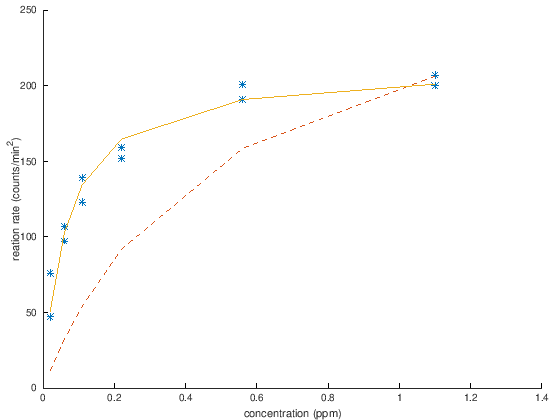

In [7]:
hold on
vapprox0 = MichaelisMenten(xconc, theta0);
vapprox = MichaelisMenten(xconc, theta_opt);
plot(xconc, vtreated, "*" )
plot(xconc, vapprox0, "--" )
plot(xconc, vapprox, "-" )
xlabel("concentration (ppm)")
ylabel("reation rate (counts/min^2)")

Fall B: Ohne Puromycin (untreated)

In [8]:
theta_optB = GaussNewtonOptim(@MichaelisMenten, xconc(1:11), vuntreated(1:11), theta0)

Iteration
k =  1
mytheta =

   300.00000     0.50000

obj =  20801.14919
delta_theta =

  -308.8197
    -1.1344

j_opt =  1
obj_opt =  20801.14919
lambda =

   1.000000   0.500000   0.250000   0.125000   0.062500   0.031250

j_opt =  3
obj_opt =  9614.3
mytheta =

   222.79507     0.21641

Iteration
k =  2
mytheta =

   222.79507     0.21641

obj =  9614.3
delta_theta =

  -92.17920
   -0.28392

j_opt =  1
obj_opt =  9614.3
lambda =

   1.000000   0.500000   0.250000   0.125000   0.062500   0.031250

j_opt =  2
obj_opt =  1527.3
mytheta =

   176.705475     0.074452

Iteration
k =  3
mytheta =

   176.705475     0.074452

obj =  1527.3
delta_theta =

  -15.997230
   -0.027323

j_opt =  1
obj_opt =  1527.3
lambda =

   1.000000   0.500000   0.250000   0.125000   0.062500   0.031250

j_opt =  1
obj_opt =  863.78
mytheta =

   160.708245     0.047129

Iteration
k =  4
mytheta =

   160.708245     0.047129

obj =  863.78
delta_theta =

  -0.48411923
   0.00048947

j_opt =  1
obj_opt =  863

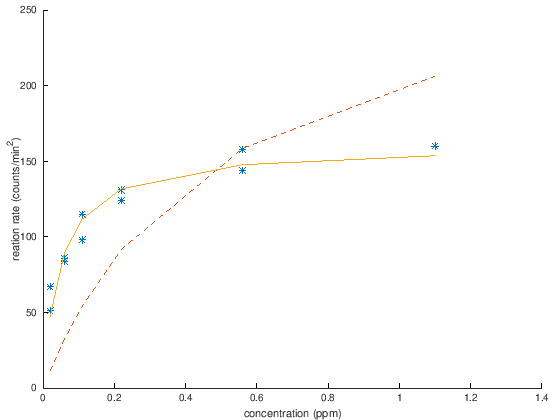

In [9]:
hold on
vapprox0 = MichaelisMenten(xconc, theta0);
vapprox = MichaelisMenten(xconc, theta_optB);
plot(xconc, vuntreated, "*" )
% plot(xconc, vuntreated, "+" )
plot(xconc, vapprox0, "--" )
plot(xconc, vapprox, "-" )
xlabel("concentration (ppm)")
ylabel("reation rate (counts/min^2)")

Vergleich der Parameter

In [10]:
theta_opt
theta_optB

theta_opt =

   212.683650     0.064121

theta_optB =

   160.279865     0.047708

